In [83]:
__author__ = "me"
__date__ = "2015_10_13"
%pylab inline
import pandas as pd
import numpy as np
import geopandas as gp
import datetime
import pylab as plt
import os

from palettable.colorbrewer.qualitative import Paired_11
from palettable.wesanderson import GrandBudapest3_6

import requests
s = requests.get("https://raw.githubusercontent.com/Casyfill/CUSP_templates/master/Py/fbMatplotlibrc.json").json()
plt.rcParams.update(s)

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [84]:
### automatically gets all dataframes from 'finished_data' folder, 
### so you can add more files and run code withoit
### any chage


def getAllFinished(mypath):
    cols = ['ID',
            'category',
            'checkIns',
            'createdAt',
            'description',
            'genCategory',
            'lat','lon',
            'name',
            'photoCount',
            'price',
            'query','rating',
            'tags','tileID',
            'time','tips',
            'users','verified']
    
    files = [ f for f in os.listdir(mypath) if (os.path.isfile(os.path.join(mypath,f)) and ('.csv' in f)) ]
#     print files
    return {k.replace('.csv',''):pd.read_csv(os.path.join(mypath,k))[cols] for k in files}

In [85]:
dfs = getAllFinished('/Users/casy/Dropbox/CUSP/project/Square_cities/data/finished_data/')

## I.a Total amount of venues vs population

In [86]:
# pop = pd.read_csv() population to be added

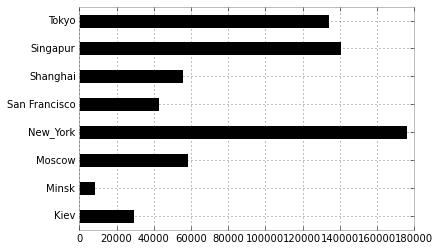

In [87]:
x = pd.Series({k:len(v) for k,v in dfs.iteritems()}).plot(kind='barh',color='k');
plt.savefig('img/cities_venues.png')

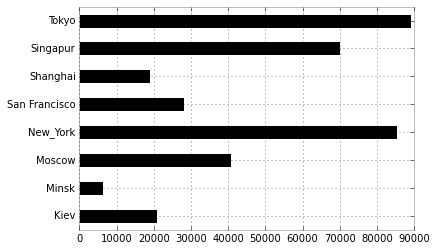

In [88]:
pd.Series({k:len(v[v.checkIns>10]) for k,v in dfs.iteritems()}).plot(kind='barh',color='k');
plt.savefig('img/cities_venues_filtered.png')

## I.b Percentage of general categories for each city (in venues. unspecified venues were filtered)

In [89]:
def getPercentage(df):
#     df['genCategory'].fillna('Unspecified', inplace=1)
    df['genCategory'].replace('126',np.nan,inplace=1)
    df = df[pd.notnull(df.genCategory)]
    
    x = 100.0*df.groupby('genCategory').size()/len(df)
#     print len(df[pd.isnull(df.genCategory)])
#     print x.sum()
    return x

In [90]:
pDF = pd.DataFrame( {k:getPercentage(v) for k,v in dfs.iteritems()})

In [91]:
pDF

,Kiev,Minsk,Moscow,New_York,San Francisco,Shanghai,Singapur,Tokyo
genCategory,,,,,,,,
Arts & Entertainment,4.784410,5.091506,5.444131,4.604829,3.883668,3.504619,3.861515,3.827947
College & University,4.681667,7.015486,5.776664,2.608524,2.370948,4.283679,7.373436,1.797429
Event,0.212336,0.422337,0.080086,0.083124,0.099320,0.078136,0.064844,0.136169
Food,9.606493,8.751760,10.811658,23.516295,21.608475,35.935561,18.542604,27.213745
Nightlife Spot,2.157608,2.686532,2.935339,5.234200,4.604375,2.895620,2.725333,5.466779
Outdoors & Recreation,7.668071,7.555138,8.858247,6.211901,8.885324,3.745921,8.804706,7.762425
Professional & Other Places,25.384431,22.512905,26.499878,22.013458,24.498943,16.852048,28.670507,17.362329
Residence,15.524504,13.761145,8.994046,3.913445,3.168055,4.835225,6.190266,1.282390
Shop & Service,23.833008,21.679962,23.153661,22.475261,23.724756,17.447258,14.073998,25.900917


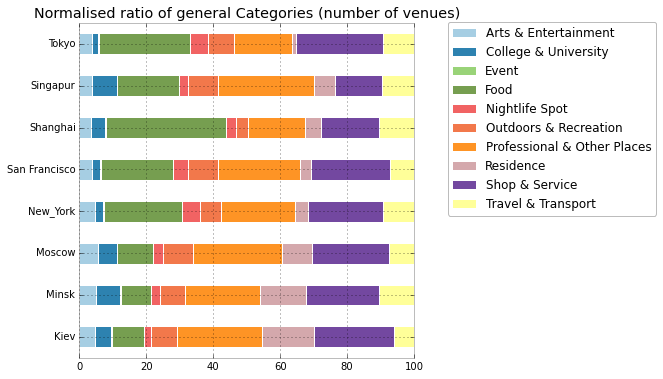

In [92]:
pDF.T.plot(kind='barh',stacked=1, figsize=(6,6), cmap=Paired_11.mpl_colormap,
           title='Normalised ratio of general Categories (number of venues)' );

lgd = plt.legend(loc=(1.1,0.425))

plt.savefig('img/cities_comparison.png', bbox_extra_artists=(lgd,), bbox_inches='tight')

## I.III Distributions of checkIns per category per city

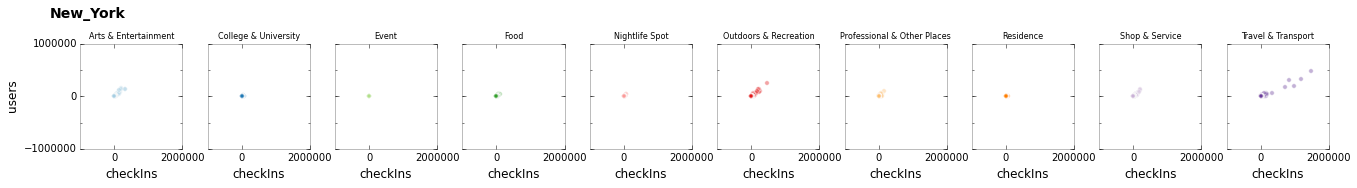

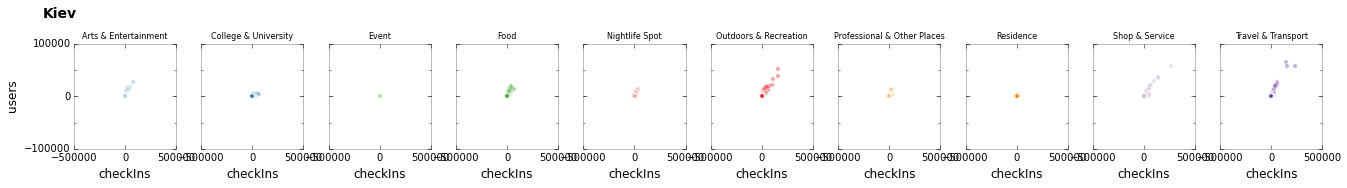

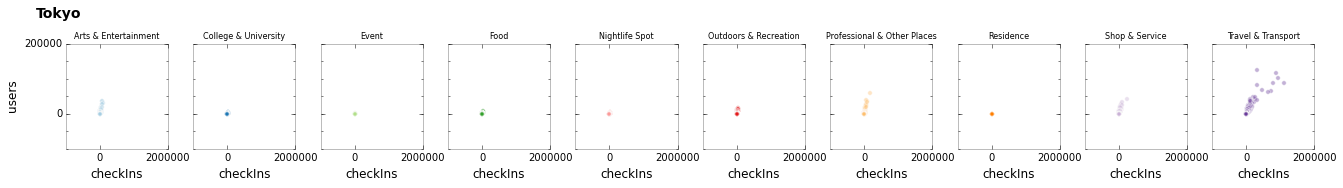

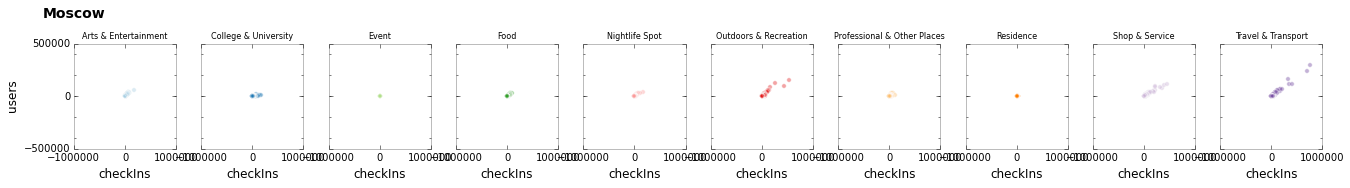

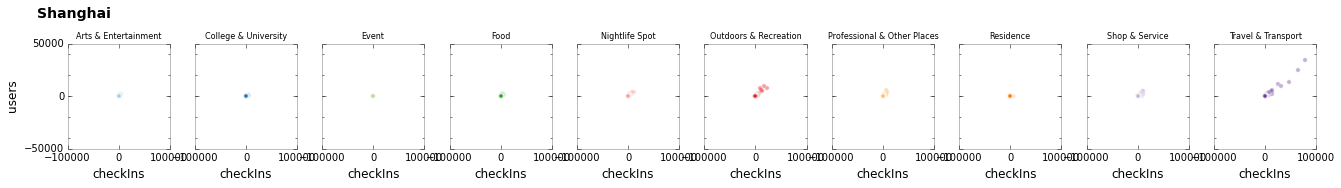

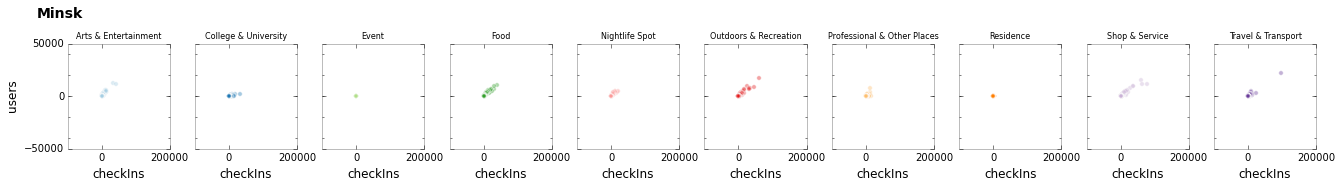

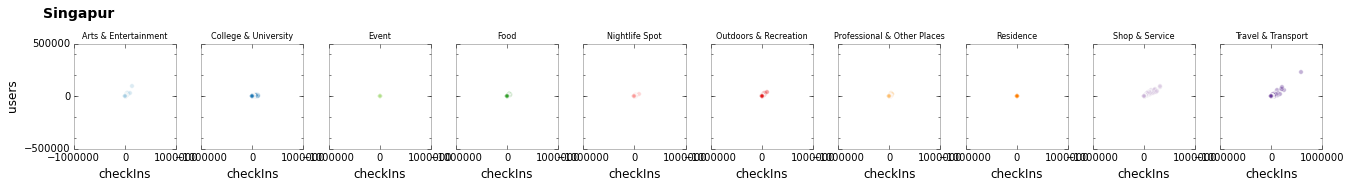

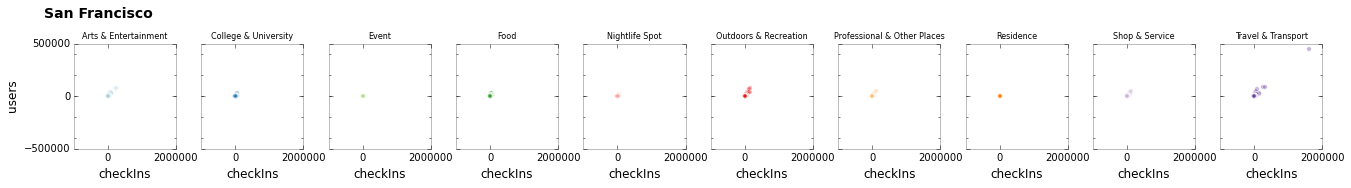

In [72]:
for key, df in dfs.iteritems():
    
    fig, axes = plt.subplots(1,10, sharey=True, sharex=True)
    fig.set_size_inches(18, 2)

    fig.tight_layout()
    
    plt.suptitle(key, fontsize=14, fontweight='bold', horizontalalignment='left',x=0,y=1.15)
    
    for j, (cat, g) in enumerate(df.groupby('genCategory')):
        axes[j].locator_params(nbins=2)
        g.plot(kind='scatter',x='checkIns',y='users',alpha=.4, color=Paired_11.mpl_colors[j],ax=axes[j],grid=0)
        axes[j].set_title(cat, fontsize=6)
#         lim = axes[j].get_ylim()[1]
#         axes[j].plot((0,0),(lim,lim))
    
    plt.savefig('img/%s_scplot_compr.png'%key, bbox_extra_artists=(lgd,), bbox_inches='tight')



In [93]:
dfs['Tokyo'].genCategory.drop_duplicates().tolist()

['Travel & Transport',
 'Shop & Service',
 'Arts & Entertainment',
 'College & University',
 'Outdoors & Recreation',
 'Professional & Other Places',
 nan,
 'Food',
 'Event',
 'Nightlife Spot',
 'Residence']

## Categories

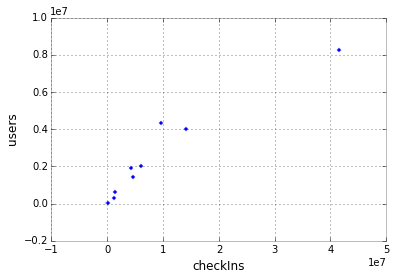

In [96]:
dfs['Tokyo'][['genCategory','users','checkIns']].groupby('genCategory').sum().plot(kind='scatter',x='checkIns',y='users')